In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./covid-19-data/mask-use/mask-use-by-county.csv')
df.index = df['COUNTYFP']
df.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
COUNTYFP,,,,,,
1001,1001,0.053,0.074,0.134,0.295,0.444
1003,1003,0.083,0.059,0.098,0.323,0.436
1005,1005,0.067,0.121,0.120,0.201,0.491
1007,1007,0.020,0.034,0.096,0.278,0.572
1009,1009,0.053,0.114,0.180,0.194,0.459


In [3]:
df_geocodes = pd.read_excel('./uscensus/all-geocodes-v2018.xlsx', skiprows=4)

In [4]:
fipscode_u = df_geocodes[['State Code (FIPS)','County Code (FIPS)']].to_numpy()
fipscodes = np.zeros(fipscode_u.shape[0], dtype=np.int)
for idx in range(fipscode_u.shape[0]):
    fipscodes[idx] = int("%d%03d" % (fipscode_u[idx,0],fipscode_u[idx,1]))
    
df_geocodes.index = fipscodes
    

In [5]:
df = df.join(df_geocodes, how='left')

In [6]:
la_df = df[df['State Code (FIPS)'] == 22]
la_df['parish'] = la_df['Area Name (including legal/statistical area description)'].str.replace('Parish','')
la_df.tail()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),parish
22119,22119,0.134,0.044,0.063,0.265,0.494,50,22,119,0,0,0,Webster Parish,Webster
22121,22121,0.044,0.040,0.070,0.197,0.649,50,22,121,0,0,0,West Baton Rouge Parish,West Baton Rouge
22123,22123,0.022,0.063,0.124,0.114,0.677,50,22,123,0,0,0,West Carroll Parish,West Carroll
22125,22125,0.072,0.130,0.037,0.265,0.496,50,22,125,0,0,0,West Feliciana Parish,West Feliciana
22127,22127,0.086,0.106,0.130,0.236,0.443,50,22,127,0,0,0,Winn Parish,Winn


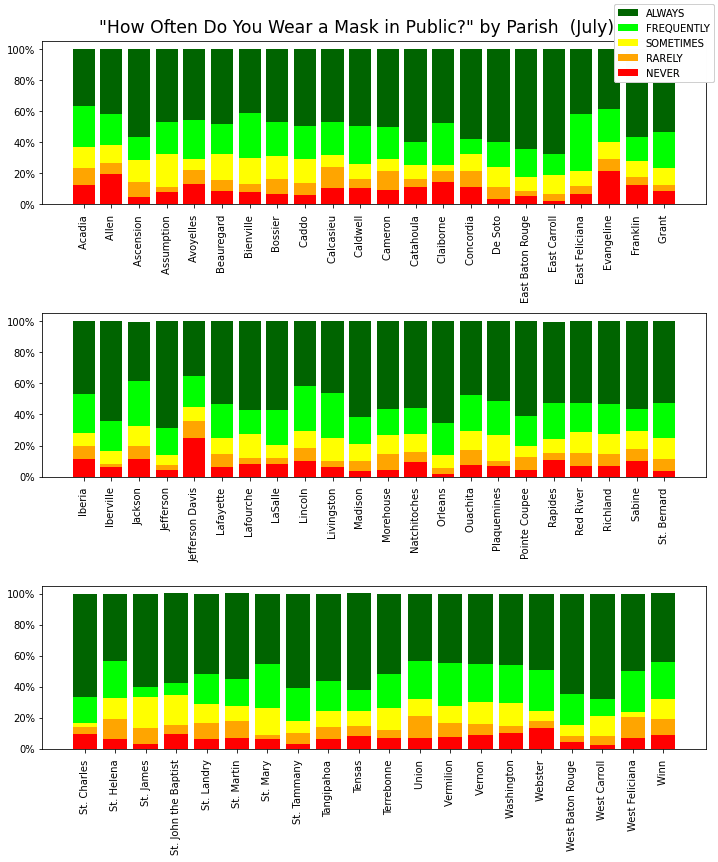

In [21]:
fig,axs = plt.subplots(3,figsize=(10,12))
pergraph = int(la_df.shape[0] / 3) + 1

metrics = ['NEVER','RARELY', 'SOMETIMES','FREQUENTLY','ALWAYS']

for idx,ax in zip(range(0,pergraph * len(axs),pergraph),axs):
    plots = []
    lasttop = np.zeros( la_df.shape[0], dtype=np.float )
    for metric, color in zip(metrics, ['r','orange','yellow','lime','darkgreen']):
        
        plots.append (ax.bar(la_df.iloc[idx:idx+pergraph]['parish'], \
           la_df.iloc[idx:idx+pergraph][metric] ,bottom=lasttop[idx:idx+pergraph],color=color))
        
        lasttop += la_df[metric]
    
    ax.tick_params(axis='x',rotation=90)
    fig.legend(reversed(plots),reversed(metrics))
    
    ax.set_yticks(np.arange(0,1.2,0.2))
    ax.set_yticklabels(["%d%%" % x for x in range(0,101,20)])
    
    
fig.suptitle('"How Often Do You Wear a Mask in Public?" by Parish  (July)',fontsize='xx-large')
fig.tight_layout()
fig.savefig("fig10.jpg")